<a href="https://colab.research.google.com/github/varunposimsetty/FFT/blob/DFT_Python/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install seaborn
!pip install pydub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import wave
from pydub import AudioSegment
from scipy.io.wavfile import read as read_audio

In [28]:
def my_fft(x):
  start_time = time.time()
  N = len(x)
  even_set = x[0::2]
  odd_set = x[1::2]
  if N <= 1:
    return x
  even_fft = my_fft(even_set)
  odd_fft = my_fft(odd_set)
  result = [0] * N
  for k in range(N // 2):
    twiddle_factor = np.exp(-2j * np.pi * k / N) * odd_fft[k]
    result[k] = even_fft[k] + twiddle_factor
    result[k + N // 2] = even_fft[k] - twiddle_factor
  return result

def compute_fft(x):
  start_time = time.time()
  fft_result = my_fft(x)
  Magnitude = np.abs(fft_result)
  Phase = np.angle(fft_result)
  end_time = time.time()
  print("Time taken: ", end_time - start_time)
  return fft_result, Magnitude, Phase

In [29]:
x = np.array([0.79, 0.12, -0.86, 0.54, -0.32, -0.98, 0.21, 1.05, -0.67, 0.43, 0.91, -0.18, -0.75, 0.39, 0.62, -0.47, -1.12, 0.08, 0.83, -0.59, -0.25, 0.95, -0.71, 0.35, 1.09, -0.63, -0.41, 0.58, 0.74, -0.29, -0.92, 0.16, 1.01, -0.79, 0.31, 0.87, -0.55, -0.37, 0.66, 0.81, -0.23, -1.06, 0.10, 0.97, -0.75, 0.27, 0.83, -0.61, -0.49, 0.54, 0.70, -0.33, -0.88, 0.20, 1.13, -0.83, 0.23, 0.79, -0.67, -0.45, 0.50, 0.66, -0.37, -0.84, 0.24, 1.07])
N = len(x)
X, Magnitude, Phase = compute_fft(x)
print("fft_result: ", my_fft(x))
print("Magnitude: ", Magnitude)
print("Phase: ", Phase)

Time taken:  0.0017499923706054688
fft_result:  [(3.36+0j), (-0.34298331919984504+0.3590455700381724j), (0.8134372253352566+0.02159809178862182j), (0.506843263941898-0.9685441078953583j), (-1.4721860209641933-0.097661952228769j), (0.25863353527671795+2.91684297231624j), (2.545687596677894-0.6975471659294006j), (3.951290463908563-0.07834427930422105j), (1.7094595210236994-0.6201812517203067j), (1.0830358339133106-0.7520230052356296j), (1.7717670437075528-1.8502907715583299j), (-3.247077770603818-1.5361111256627749j), (-0.5830787513833271-8.367426767447093j), (0.8539058722030721+1.9462829763174754j), (4.37366391086297-2.745948940383744j), (-0.49829879076195593-5.792639351723869j), (-3.753346329461689-0.34960356871405246j), (-0.7127688577457855-9.109994653944089j), (16.811905933192296+11.431076414364611j), (7.109231289309454-2.2222625066111306j), (1.6331339600198322-1.4143813019246632j), (2.488611989343677+0.04406914934632067j), (2.4324735982495254-3.793263776530816j), (-6.988709404966535

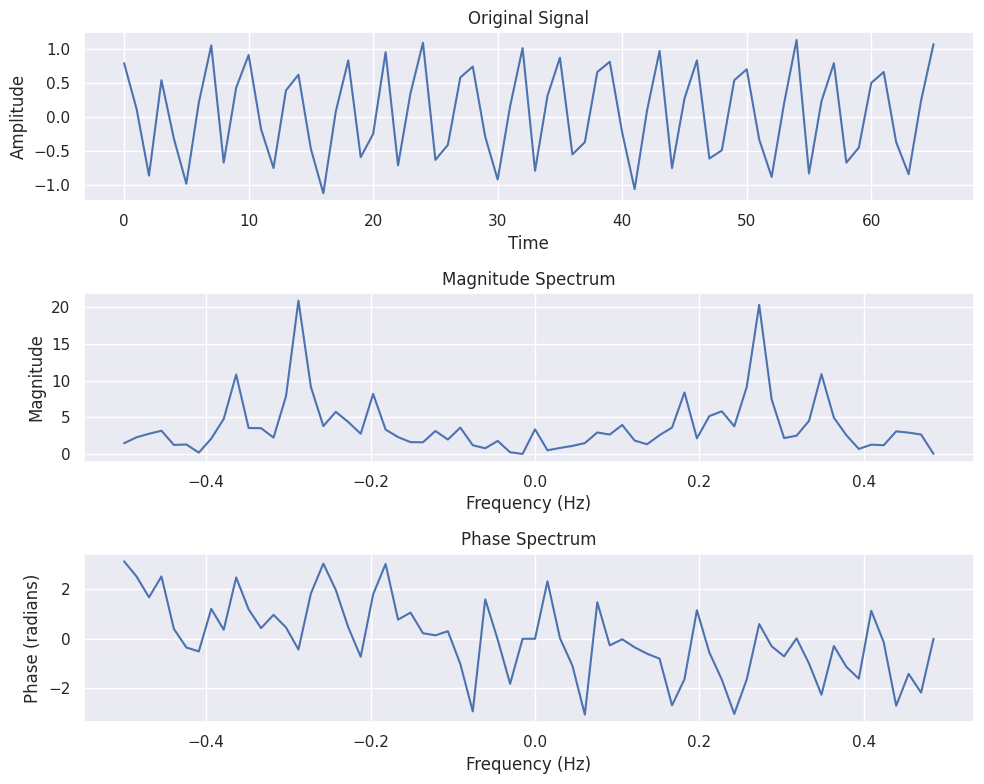

In [30]:
fs = 1
frequencies = np.fft.fftfreq(N, 1/fs)
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
sns.lineplot(x=range(N), y=x, ax=ax1)
ax1.set_title("Original Signal")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude, ax=ax2)
ax2.set_title("Magnitude Spectrum")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase, ax=ax3)
ax3.set_title("Phase Spectrum")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Phase (radians)")

plt.tight_layout()
plt.show()

In [31]:
audio = AudioSegment.from_file("Music_1.mp3", format="mp3")
audio.export("Music_1.wav", format="wav")
filename = "Music_1.wav"
sampling_rate, audio_signal = read_audio(filename)
print(f"Sampling Rate: {sampling_rate}")
print(f"Audio Signal Length: {len(audio_signal)}")
audio_signal = audio_signal/np.max(np.abs(audio_signal))

Sampling Rate: 44100
Audio Signal Length: 11139072


In [32]:
x = audio_signal[:8192]
N = len(x)
X, Magnitude, Phase = compute_fft(x)
print("X: ", X)
print("Magnitude: ", Magnitude)
print("Phase: ", Phase)

Time taken:  0.19615459442138672
X:  [(-0.02021660649819493+0j), (0.08012125813780938-0.22970720699878436j), (-0.08872881745640676-0.14291603987413712j), (-0.32939013204587086-0.017341320900524974j), (-0.3197538137672524-0.12586807541085954j), (0.3396050499123343+0.4485193328857555j), (-0.011320182241927542-0.4379425167827402j), (-0.7619262120842492-0.3694466075542596j), (-0.591527279628754+1.0897014157663236j), (-0.535628890712849-0.3061294067407718j), (0.48866434568845785-0.25966508690860385j), (-0.6280537942953252-1.1952407514117032j), (0.37083127471323374+0.2947702676697602j), (0.6590142285501939+1.4956823596827622j), (0.7411260520039127-0.0176399186995018j), (0.448940305037918-0.9335704441672148j), (0.3223799775234685+0.34723168818398675j), (0.49243576739639217+1.0999160940460015j), (-0.13703802552167865+0.7221051157170657j), (0.6493572712399712-0.15446083252451487j), (-0.3055970284220926-0.22600694654322612j), (0.5065185082525605+0.2117480992672194j), (0.4538005075657422+1.394455

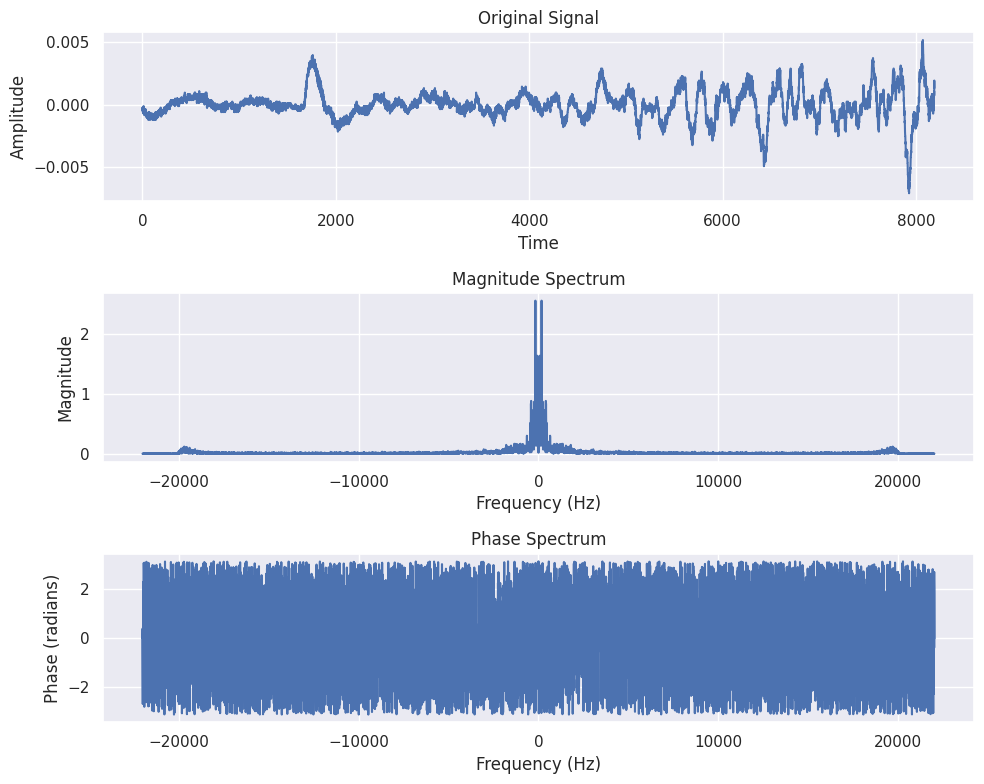

In [33]:
fs = sampling_rate
frequencies = np.fft.fftfreq(N, 1/fs)
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
sns.lineplot(x=range(N), y=x, ax=ax1)
ax1.set_title("Original Signal")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude, ax=ax2)
ax2.set_title("Magnitude Spectrum")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase, ax=ax3)
ax3.set_title("Phase Spectrum")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Phase (radians)")

plt.tight_layout()
plt.show()

In [34]:
audio = AudioSegment.from_file("Music_2.mp3", format="mp3")
audio.export("Music_2.wav", format="wav")
filename = "Music_2.wav"
sampling_rate, audio_signal = read_audio(filename)
print(f"Sampling Rate: {sampling_rate}")
print(f"Audio Signal Length: {len(audio_signal)}")
audio_signal = audio_signal/np.max(np.abs(audio_signal))
left_channel = audio_signal[:, 0]
right_channel = audio_signal[:, 1]

Sampling Rate: 44100
Audio Signal Length: 8145792


Time taken:  0.37783169746398926
Time taken:  0.2933387756347656


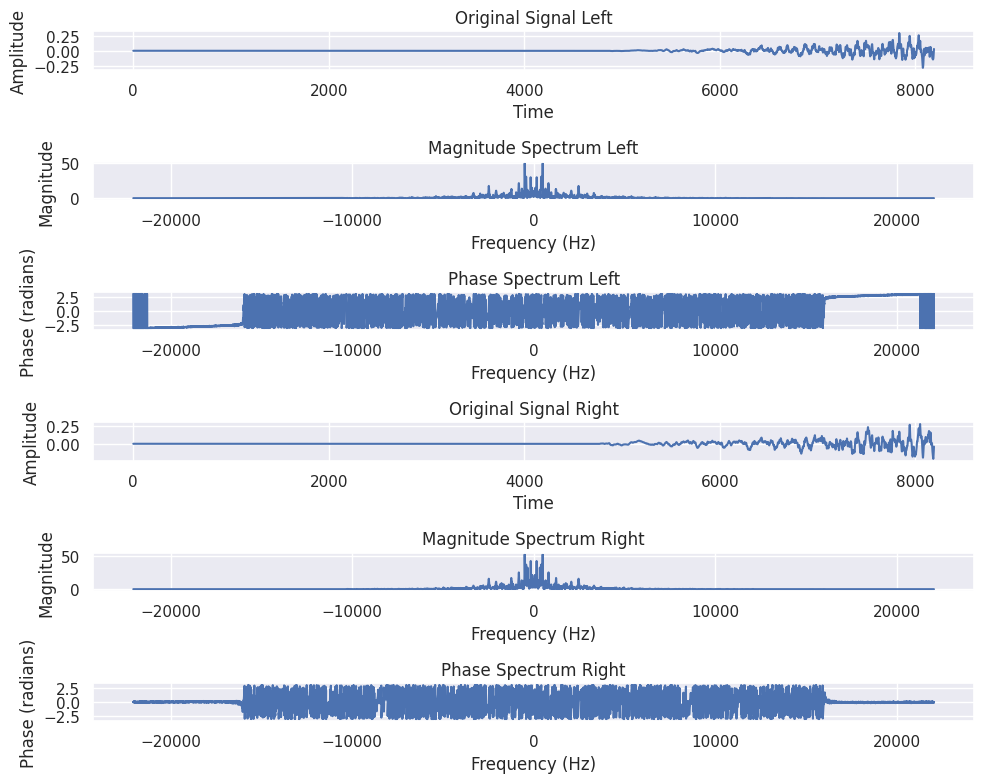

In [35]:
X_left, Magnitude_left, Phase_left = compute_fft(left_channel[:8192])
X_right, Magnitude_right, Phase_right = compute_fft(right_channel[:8192])
N = len(left_channel[:8192])
fs = sampling_rate
frequencies = np.fft.fftfreq(N, 1/fs)
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(10, 8))


sns.lineplot(x=range(N), y=left_channel[:N], ax=ax1)
ax1.set_title("Original Signal Left")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude_left, ax=ax2)
ax2.set_title("Magnitude Spectrum Left")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase_left, ax=ax3)
ax3.set_title("Phase Spectrum Left")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Phase (radians)")


sns.lineplot(x=range(N), y=right_channel[:N], ax=ax4)
ax4.set_title("Original Signal Right")
ax4.set_xlabel("Time")
ax4.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude_right, ax=ax5)
ax5.set_title("Magnitude Spectrum Right")
ax5.set_xlabel("Frequency (Hz)")
ax5.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase_right, ax=ax6)
ax6.set_title("Phase Spectrum Right")
ax6.set_xlabel("Frequency (Hz)")
ax6.set_ylabel("Phase (radians)")

plt.tight_layout()
plt.show()

The improvement it has is shown is approximately 300x